### 생선 분류 
 - 데이터셋 : fish.csv.
 - 피쳐/특성 : Weight, Lenght
 - 타겟/ 라벨 : Species
 - 학습 방법 : 지도 학습 = > 분류
 - 학습 알고리즘 : 최근접이웃알고리즘

In [52]:
# [1] 데이터 준비
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
DATA_file = '../data/fish.csv'

In [54]:
# 행 : Bream, Smelt   컬럼 : Species, Weight, Lenght => 0,1,2 
fishDF = pd.read_csv(DATA_file, usecols=[0,1,2])# 컬럼명도 가능
fishDF.head()

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [55]:
mask = (fishDF['Species'] == "Bream")| (fishDF['Species'] == "Smelt")
twoDF = fishDF[mask]
twoDF.reset_index(drop=True, inplace=True)
twoDF.index

RangeIndex(start=0, stop=49, step=1)

In [56]:
# Species 컬럼을 수치화 => Bream 0, Smelt 1
new_cols = twoDF['Species'].replace({'Bream':0, 'Smelt':1})
twoDF['FCode'] = new_cols

C:\Users\KDP-23\AppData\Local\Temp\ipykernel_14592\3829503867.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twoDF['FCode'] = new_cols


In [57]:
twoDF.head(1)

,Species,Weight,Length,FCode
0,Bream,242.0,25.4,0


### 2. 피쳐와 타겟 분리

In [58]:
features = twoDF[['Weight','Length']]
target = twoDF['FCode']
print(f'features: {features.shape}, {features.ndim}D')
print(f'target: {target.shape}, {target.ndim}D')

features: (49, 2), 2D
target: (49,), 1D


### 3. 데이터셋 준비 --> 학습용, 테스트용

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
# train: test = 80:20 ===> test_size=0.2  또는 train_size = 0.8
# stratfy 메개변수 >> 분류인 경우 사용, 분류 타겟의 종류에 대한 비율을 고려
x_train, x_test, y_train, y_test = train_test_split(features, 
                                                    target,
                                                    test_size=0.2,
                                                    stratify = target,
                                                    random_state=10)

In [61]:
# train : test 80:20체크
print(f'x_train : {x_train.shape}, {x_train.ndim}D')
print(f'y_train : {y_train.shape}, {y_train.ndim}D')

print(f'x_test : {x_test.shape}, {x_test.ndim}D')
print(f'y_test : {y_test.shape}, {y_test.ndim}D')

x_train : (39, 2), 2D
y_train : (39,), 1D
x_test : (10, 2), 2D
y_test : (10,), 1D


In [64]:
# target 0(Bream), 1(Smelt)의 비율
y_train.value_counts()[0]/y_train.shape[0], y_train.value_counts()[1]/y_train.shape[1]

IndexError: tuple index out of range

In [65]:
y_test.value_counts()[0]/y_test.shape[0], y_test.value_counts()[1]/y_test.shape[1]

IndexError: tuple index out of range

### 4 검증
- 학습알고리즘 인스턴스 생성
- 학습 진행  

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [67]:
# 인스턴스 생성
model = KNeighborsClassifier()

In [68]:
# 학습진행 ==>  학습용 데이터셋
model.fit(x_train, y_train)

KNeighborsClassifier()

In [69]:
# 학습 후 모델 파라미터
model.classes_, model.feature_names_in_, model.n_samples_fit_

(array([0, 1], dtype=int64), array(['Weight', 'Length'], dtype=object), 39)

In [70]:
model.score(x_test, y_test)

1.0

#### 6. 예측 하기  == > 학습/ 훈련과 테스트에 사용되지 않은 데이터 사용
 - 주의 : 입력 데이터 ==> 2D
 

In [71]:
new_data =pd.DataFrame([[413,27.8]], columns=model.feature_names_in_)
new_data


,Weight,Length
0,413,27.8


In [72]:
model.predict(new_data)

array([0], dtype=int64)

In [78]:
### 최근접한 k개 데이터 찾기
distance, idx = model.kneighbors(new_data)

In [79]:
distance

array([[17.04230031, 23.10497782, 37.04875167, 37.0653477 , 50.01439793]])

In [84]:
neighbors = idx.reshape(-1).tolist()

In [85]:
twoDF.iloc[neighbors]

,Species,Weight,Length,FCode
25,Bream,725.0,35.0,0
0,Bream,242.0,25.4,0
21,Bream,685.0,34.0,0
6,Bream,500.0,29.7,0
22,Bream,620.0,34.5,0


In [89]:
new_data['Weight'],new_data['Length']

(0    413
 Name: Weight, dtype: int64,
 0    27.8
 Name: Length, dtype: float64)

In [91]:
twoDF.iloc [neighbors]['Weight'],twoDF.iloc [neighbors]['Length'] 

(25    725.0
 0     242.0
 21    685.0
 6     500.0
 22    620.0
 Name: Weight, dtype: float64,
 25    35.0
 0     25.4
 21    34.0
 6     29.7
 22    34.5
 Name: Length, dtype: float64)

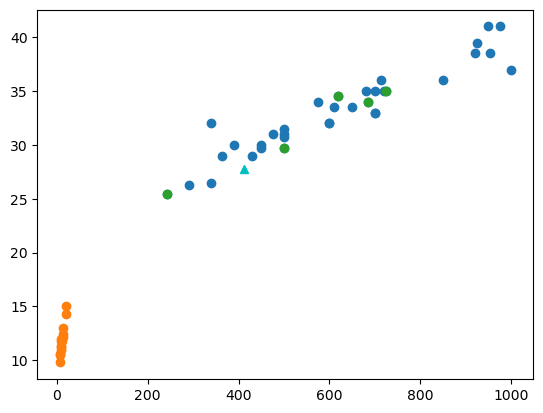

In [92]:
plt.scatter(twoDF.loc[:34 ,'Weight'], twoDF.loc[:34 ,'Length']) 
plt.scatter(twoDF.loc[35: ,'Weight'], twoDF.loc[35: ,'Length'])
plt.plot(new_data['Weight'],new_data['Length'], 'c^')
plt.scatter(twoDF.iloc [neighbors]['Weight'],twoDF.iloc [neighbors]['Length'] )
plt.show()

값이 이상하다 >> K가 최근접이어야하는데??? >> 수치가 x,y 맞지않아 그렇다
>>>> 수치 피쳐값 정규화 가 필요하다.